In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


## Load a dataset

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


[0 1 2 3 4 5 6 7 8 9]


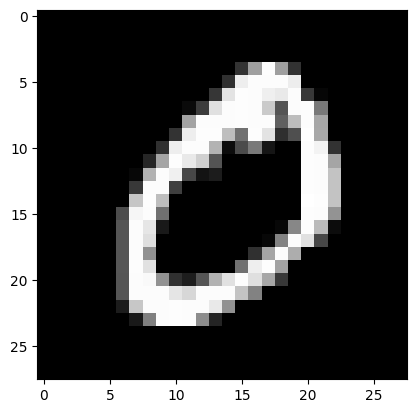

In [6]:
import numpy as np
import matplotlib.pyplot as plt


print(np.unique(y_train))
plt.imshow(x_train[1], cmap="gray")

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8661 - loss: 0.4684
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9541 - loss: 0.1504
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9671 - loss: 0.1104
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9738 - loss: 0.0853
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9771 - loss: 0.0740


In [10]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 2s - 5ms/step - accuracy: 0.9774 - loss: 0.0737


[0.07373563200235367, 0.977400004863739]

In [11]:
y_test[12]

np.uint8(9)

In [13]:
x_test[12].shape

(28, 28)

In [14]:
test_sample = x_test[12].reshape(1,28,28)
test_sample.shape

(1, 28, 28)

In [15]:
model.predict(test_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


array([[-10.703695  , -10.065521  ,  -5.771019  ,  -0.55641335,
          3.5749466 ,  -4.2315884 , -12.684587  ,  -0.77429014,
         -3.7943788 ,   9.967425  ]], dtype=float32)

In [16]:
# Since we do not use softmax in our model, so the values are not probability. To understand the label then we need to use softmax for prediction now
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [17]:
probability_model.predict(test_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


array([[1.0517159e-09, 1.9909170e-09, 1.4592584e-07, 2.6841482e-05,
        1.6712191e-03, 6.8029681e-07, 1.4508013e-10, 2.1586588e-05,
        1.0533579e-06, 9.9827850e-01]], dtype=float32)